In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from lifestore_file import lifestore_products, lifestore_sales, lifestore_searches

In [3]:
#Se convierten a DataFrame las listas

pd_products = pd.DataFrame(lifestore_products, columns=['id_product', 'name', 'price', 'category', 'stock'])

pd_searches = pd.DataFrame(lifestore_searches, columns=['id_search', 'id product'])

pd_sales = pd.DataFrame(lifestore_sales, columns =['id_sale', 'id_product', 'score', 'date', 'refund'])
#score (from 1 to 5)
#refund (1 for true or 0 to false)
#Nótese que el formato de 'date' es día/mes/año

In [4]:
df_sales = pd_sales.loc[:, ['id_product', 'refund', 'date']]
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%d/%m/%Y')
df_sales = df_sales.sort_values('date')

In [5]:
print('Fecha inicial:\t{}'.format(min(df_sales['date'])))
print('Fecha final:\t{}'.format(max(df_sales['date'])))

Fecha inicial:	2019-11-10 00:00:00
Fecha final:	2020-09-05 00:00:00


In [6]:
init_date = min(df_sales['date'])
end_date = max(df_sales['date'])

#Se crea una lista de fechas mensuales desde la fecha inicial hasta la fecha final
Fechas = pd.date_range(init_date.replace(day=1), end_date.replace(day=1), 
              freq='MS').strftime("%Y-%m").tolist()

In [7]:
#Se creará un diccionario que contenga:
#fecha (formato mes/Año), ventas brutas (ventas realizadas sin importar devoluciones)
#ganancias netas (ganancias descontando devoluciones), ventas promedio mensuales (ganancias netas/ventas netas)
ingresos = {}

for idx, fecha in enumerate(Fechas):
    #Ventas por mes    
    if idx==len(Fechas)-1:
        ventas_mes = df_sales[df_sales['date']>=Fechas[-1]]
    else:
        ventas_mes = df_sales[(df_sales['date']<Fechas[idx+1]) & (df_sales['date']>=Fechas[idx])]
    #Cantidad de ventas realizadas
    ventas_brutas = len(ventas_mes)
    #Cantidad de ventas realizadas descontando devoluciones
    vent_net = ventas_mes[ventas_mes['refund']==0]
    ventas_netas = len(vent_net)
    ganancias = 0
    for i in range(ventas_netas):
        #Se obtiene el ID del producto vendido
        idx = vent_net.iloc[i, 0]
        ganancias+=pd_products.iloc[idx-1, 2]
    if ventas_netas==0:
        ventas_prom=0
    else:
        ventas_prom = ganancias/ventas_netas
    ingresos[fecha] = {'Ventas':ventas_brutas, 'Ganancias':ganancias, 'Ventas promedio':ventas_prom}

In [8]:
df_ingresos = pd.DataFrame.from_dict(ingresos, orient='index')

In [9]:
print("\033[1m" + 'Ingreso Total' + "\033[0m" + ' = {}'.format(np.sum(df_ingresos['Ganancias'])))

Ingreso Total = 737916


In [10]:
print("\033[1m" + '\nReporte de ingresos mensuales' + "\033[0m")
df_ingresos


Reporte de ingresos mensuales


,Ventas,Ganancias,Ventas promedio
2019-11,1,0,0.000000
2019-12,0,0,0.000000
2020-01,53,117738,2264.192308
2020-02,41,107270,2681.750000
2020-03,51,162931,3325.122449
2020-04,75,191066,2581.972973
2020-05,36,91936,2704.000000
2020-06,11,36949,3359.000000
2020-07,11,26949,2449.909091
2020-08,3,3077,1025.666667


In [11]:
print("\033[1m" + 'Reporte de ingresos mensuales:' + "\033[0m")
print('Fecha\tVentas\tGanancias\tVentas promedio')
for idx in range(len(df_ingresos)):
    mes = df_ingresos.index[idx]
    venta = df_ingresos.iloc[idx, 0]
    ganancia = df_ingresos.iloc[idx, 1]
    ventas_prom = df_ingresos.iloc[idx, 2]
    print(f'{mes}\t{venta}\t{ganancia}\t\t{ventas_prom}')

Reporte de ingresos mensuales:
Fecha	Ventas	Ganancias	Ventas promedio
2019-11	1	0		0.0
2019-12	0	0		0.0
2020-01	53	117738		2264.1923076923076
2020-02	41	107270		2681.75
2020-03	51	162931		3325.122448979592
2020-04	75	191066		2581.972972972973
2020-05	36	91936		2704.0
2020-06	11	36949		3359.0
2020-07	11	26949		2449.909090909091
2020-08	3	3077		1025.6666666666667
2020-09	1	0		0.0


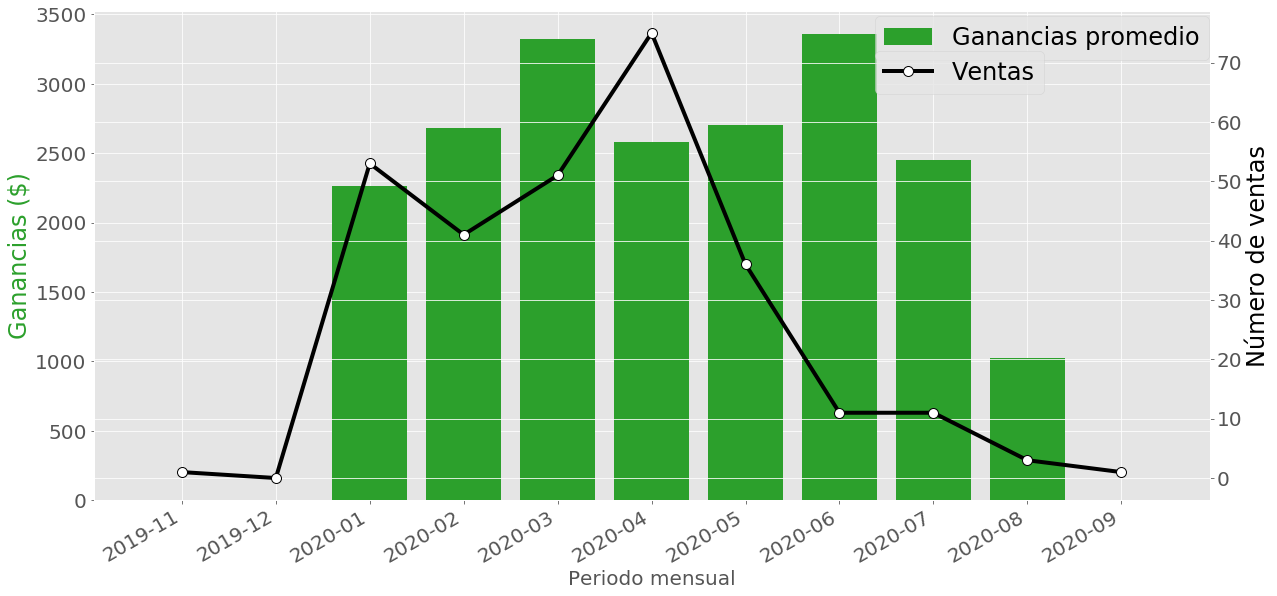

In [12]:
##############################################################
################# Se grafican los ingresos ###################
##############################################################

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
#plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:green'
ax1.bar(df_ingresos.index, df_ingresos['Ventas promedio'], color=color, linewidth=3, label='Ganancias promedio')
ax1.set_xlabel('Periodo mensual', fontsize=20)
ax1.set_ylabel('Ganancias ($)', fontsize=24, color=color)
# ax1.set_xlim(-4, 100)
# ax1.set_ylim(0, 1005)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=[0.7, 0.9], fontsize=24)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# x = [i+1 for i in range(len(pd_products))]
ax2.plot(df_ingresos.index, df_ingresos['Ventas'], '-o', color='black', mfc='white', linewidth=4, markersize=10, label='Ventas')
# sum_scores = [sum(scores) for scores in df_score['reseñas']]
# ax2.plot(x, sum_scores, '-o', color='black', mfc='white', markersize=10, label='Ventas netas')
ax2.set_xlabel('Periodo mensual', fontsize=20)
ax2.set_ylabel('Número de ventas', fontsize=24, color='black')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


# nsticks=10
# x = np.array([int((len(pd_products)-1)/nsticks*i+1) for i in range(nsticks+1)])
# my_xticks = [i for i in x]
# plt.xticks(x, my_xticks)
plt.gcf().autofmt_xdate()

plt.legend(loc=[.7, .83], fontsize=24)